In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 70295 files belonging to 38 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[134.5  124.5  122.5 ]
   [146.25 136.25 134.25]
   [151.75 141.75 139.75]
   ...
   [ 34.25  56.75  11.75]
   [ 68.75  85.75  41.  ]
   [ 68.75  81.75  36.25]]

  [[144.25 134.25 132.25]
   [151.75 141.75 139.75]
   [144.   134.   132.  ]
   ...
   [ 37.25  59.    17.75]
   [ 62.75  79.25  38.25]
   [ 71.75  84.25  42.5 ]]

  [[144.5  134.5  132.5 ]
   [130.25 120.25 118.25]
   [146.5  136.5  134.5 ]
   ...
   [ 38.25  59.5   22.  ]
   [ 65.75  81.25  46.25]
   [ 84.    95.5   61.5 ]]

  ...

  [[164.   156.   153.  ]
   [176.5  168.5  165.5 ]
   [163.5  155.5  152.5 ]
   ...
   [164.75 153.75 134.75]
   [161.75 150.25 133.25]
   [148.25 136.25 119.5 ]]

  [[164.75 156.75 153.75]
   [194.   186.   183.  ]
   [169.75 161.75 158.75]
   ...
   [163.   151.   137.  ]
   [160.   150.5  138.  ]
   [156.5  147.   134.5 ]]

  [[170.   162.   159.  ]
   [170.25 162.25 159.25]
   [177.   169.   166.  ]
   ...
   [164.5  151.   146.5 ]
   [162.75 151.75 146.75]
   [161.75 152.75 14

In [6]:
##AVOIDING OVERSHOOTING


In [7]:
##Building Model
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [8]:
model = Sequential()

In [9]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPool2D

# Input layer first
model = Sequential()
model.add(Input(shape=[128, 128, 3]))  # Input shape should be defined only here
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))


In [10]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPool2D

# Initialize the Sequential model
model = Sequential()

# Add Input layer explicitly to define input shape
model.add(Input(shape=(128, 128, 3)))  # Define input shape only here

# Add Conv2D layers without 'input_shape'
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

# Add MaxPooling layer
model.add(MaxPool2D(pool_size=2, strides=2))


In [11]:
## Building Convolutional Layer 
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))


In [12]:
## Building Convolutional Layer 
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units = 1500,activation = 'relu'))

In [16]:
model.add(Dropout(0.4))

In [17]:
#Output layer
model.add(Dense (units = 38,activation = 'softmax'))

In [18]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 63, 63, 256)         │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 61, 61, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │     150,529,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 154,903,018 (590.91 MB)

 Trainable params: 154,903,018 (590.91 MB)

 Non-trainable params: 0 (0.00 B)

## MODEL TRAINING


In [ ]:
training_history = model.fit(x=training_set,validation_data =validation_set,epochs = 10)

Epoch 1/10
 446/2197 ━━━━━━━━━━━━━━━━━━━━ 1:21:49 3s/step - accuracy: 0.2758 - loss: 4.1779

In [19]:
## Model evaluation on training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 629s 286ms/step - accuracy: 0.9703 - loss: 0.0955


In [20]:
print(train_loss,train_acc)

0.08368795365095139 0.9735543131828308


In [21]:
#Model evaluation on validation set
val_loss,val_acc = model.evaluate(validation_set)


550/550 ━━━━━━━━━━━━━━━━━━━━ 156s 283ms/step - accuracy: 0.8877 - loss: 0.4778


In [22]:
print(val_loss,val_acc)

0.48146477341651917 0.8902230858802795


In [23]:
model.save("trained_model.h5")

In [24]:
model.save("trained_model.keras")

In [25]:
training_history.history

{'accuracy': [0.5691869854927063,
  0.8588235378265381,
  0.9144035577774048,
  0.9364108443260193,
  0.9523437023162842,
  0.9564122557640076,
  0.9614481925964355,
  0.9647201299667358,
  0.9690731763839722,
  0.9673091769218445],
 'loss': [1.6303461790084839,
  0.4411298930644989,
  0.2642926275730133,
  0.19723829627037048,
  0.1490277349948883,
  0.14140015840530396,
  0.1282631903886795,
  0.11705592274665833,
  0.10331060737371445,
  0.11399827897548676],
 'val_accuracy': [0.8186318874359131,
  0.8761666417121887,
  0.8898247480392456,
  0.841395378112793,
  0.8991008400917053,
  0.9004097580909729,
  0.8875483870506287,
  0.8788982629776001,
  0.8693375587463379,
  0.8902230858802795],
 'val_loss': [0.5943586230278015,
  0.40804630517959595,
  0.36144959926605225,
  0.626341700553894,
  0.4288598597049713,
  0.373049795627594,
  0.47617968916893005,
  0.5169284343719482,
  0.7967078685760498,
  0.48146483302116394]}

In [26]:
#RECORDING HISTORY IN JSON
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

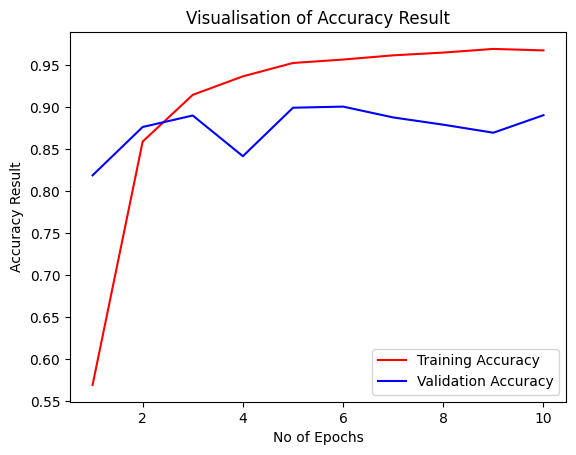

In [27]:
## ACCURACY VISUALISATION
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color ='red',label = ['Training Accuracy'])
plt.plot(epochs,training_history.history['val_accuracy'],color ='blue',label = ['Validation Accuracy'])
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy Result')
plt.title("Visualisation of Accuracy Result")
plt.legend()

plt.show()

In [28]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [29]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [30]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 152s 275ms/step


(array([[9.9988413e-01, 1.1891412e-06, 4.4048568e-07, ..., 8.1237473e-12,
         1.9165793e-07, 1.8528247e-11],
        [9.9999976e-01, 2.9434315e-08, 1.8766824e-10, ..., 1.0804421e-21,
         1.0810061e-15, 1.3419322e-20],
        [9.9996471e-01, 5.6301732e-09, 1.2040670e-10, ..., 1.8267304e-13,
         2.3799638e-12, 1.8994947e-10],
        ...,
        [5.0752832e-14, 3.3584014e-20, 2.1156760e-11, ..., 8.7503904e-10,
         3.0054904e-15, 9.9999595e-01],
        [1.4520555e-19, 5.8804070e-29, 4.3161388e-21, ..., 1.5422393e-07,
         7.1871539e-20, 9.9999988e-01],
        [8.2314897e-22, 1.3469288e-17, 3.7341098e-20, ..., 9.4010161e-14,
         6.6788941e-10, 9.9999928e-01]], dtype=float32),
 (17572, 38))

In [31]:
predicted_cateogories = tf.argmax(y_pred,axis = 1)
predicted_cateogories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [32]:
true_cateogory = tf.concat([y for x,y in test_set],axis = 0)
true_cateogory

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [33]:
y_true = tf.argmax(true_cateogory,axis = 1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(classification_report(y_true,predicted_cateogories,target_names = class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.81      0.87       504
                                 Apple___Black_rot       0.94      0.96      0.95       497
                          Apple___Cedar_apple_rust       0.93      0.93      0.93       440
                                   Apple___healthy       0.79      0.95      0.86       502
                               Blueberry___healthy       0.95      0.85      0.90       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.93      0.95       421
                 Cherry_(including_sour)___healthy       0.96      0.90      0.93       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.83      0.90      0.87       410
                       Corn_(maize)___Common_rust_       0.99      0.97      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.89      0.

In [36]:
cm = confusion_matrix(y_true,predicted_cateogories)
cm.shape

(38, 38)

## CONFUSION MATRIX


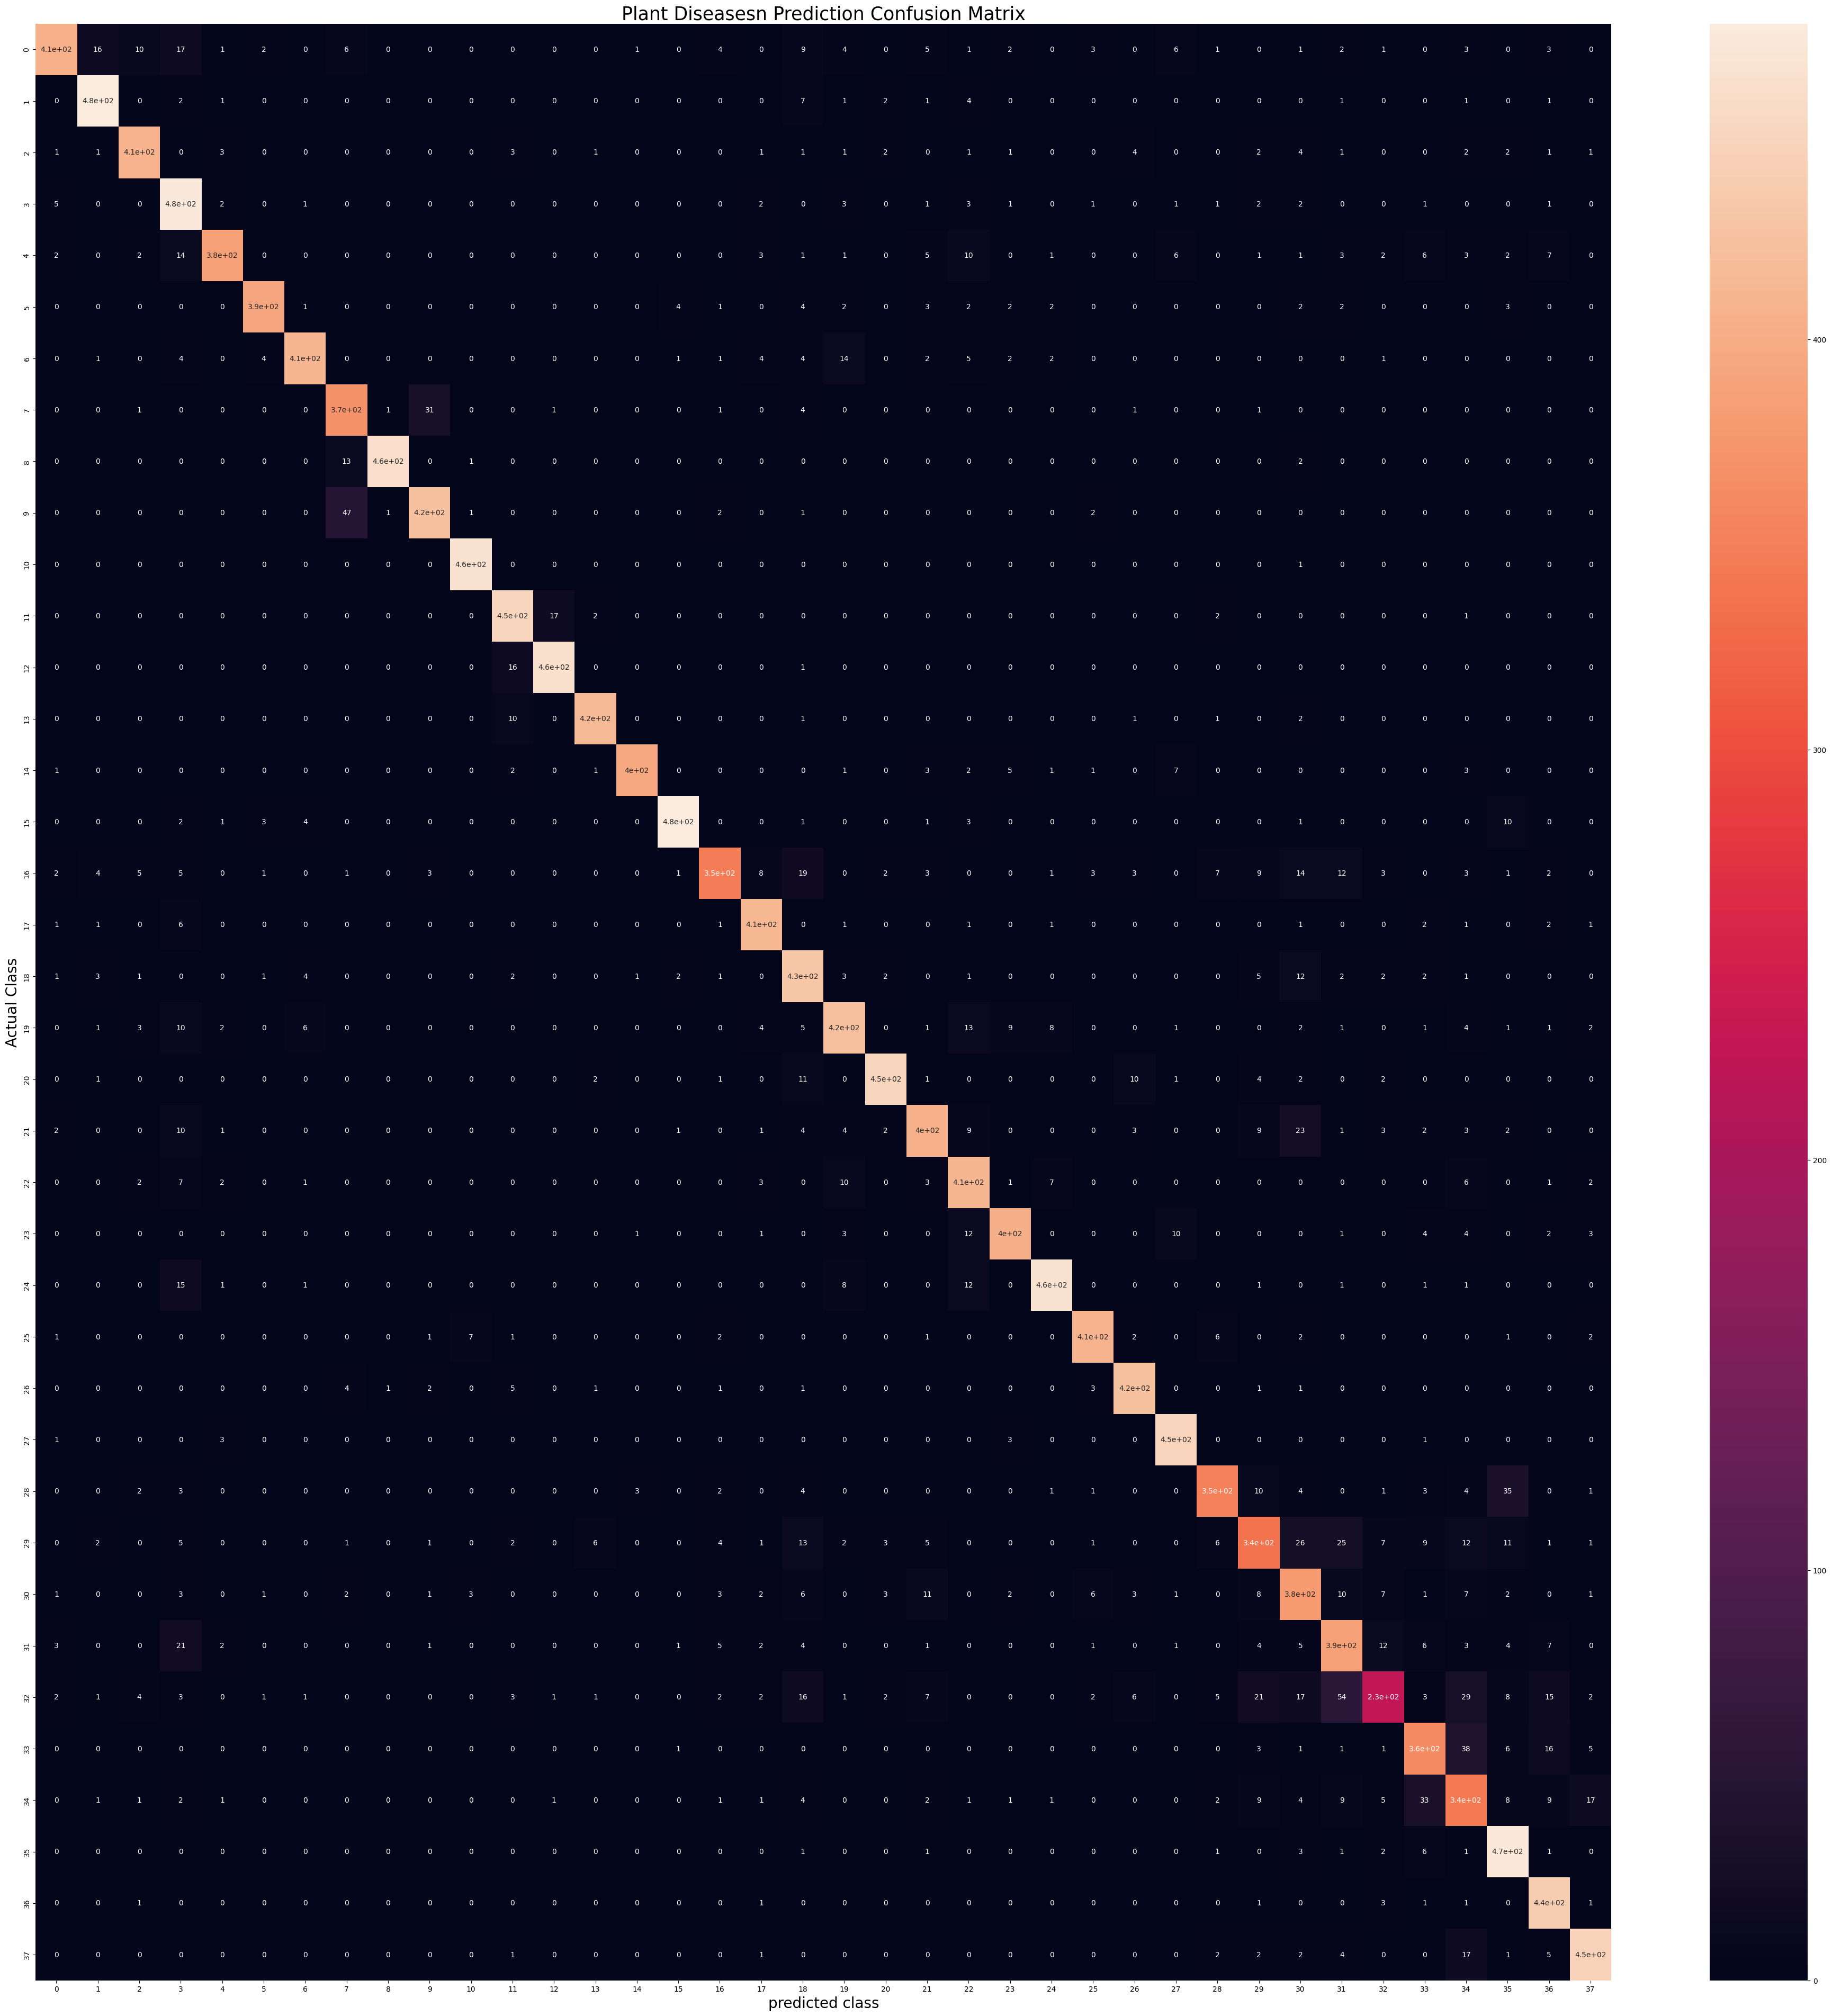

In [37]:
plt.figure(figsize=(48,48))
sns.heatmap(cm,annot = True,annot_kws = {'size':10})
plt.xlabel("predicted class",fontsize = 20)
plt.ylabel("Actual Class",fontsize = 20)
plt.title("Plant Diseasesn Prediction Confusion Matrix" ,fontsize = 25)
plt.show()